### NeuroSYS Assignment

Magdalena Wolniaczyk

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt

### 1.

In [2]:
conn = sqlite3.connect('database.db')
c = conn.cursor()

In [3]:
c.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(c.fetchall())

[('data',), ('connection',), ('additional_data',)]


In [4]:
cursor = c.execute('SELECT * FROM data')
data = c.fetchall()

print('Length of the table:', len(data))

columns_names = list(map(lambda x: x[0], cursor.description))
print('Columns names are:', columns_names)

for row in data[:5]:
    print(row)

Length of the table: 101300
Columns names are: ['id', 'x', 'y', 'z', 'connection_id']
(1, 44.62894693090455, '97.81099110033537', 569.7004532585571, 105)
(2, 40.764309055564155, '82.0486367746882', 653.9040637023857, 76)
(3, 25.849509311338426, '63.29510234435348', 374.1711758229815, 72)
(4, 18.973395754992428, '50.59596955801666', 440.9766346304599, 239)
(5, 44.7876215662726, '39.347747208411256', 219.38896277499066, 152)


In [5]:
cursor = c.execute('SELECT * FROM connection')
data = c.fetchall()

print('Length of the table:', len(data))

columns_names = list(map(lambda x: x[0], cursor.description))
print('Columns names are:', columns_names)

for row in data[:5]:
    print(row)

Length of the table: 36
Columns names are: ['id', 'name']
(2, 'blue')
(4, 'blue')
(9, 'blue')
(10, 'blue')
(15, 'blue')


In [6]:
cursor = c.execute('SELECT * FROM additional_data')
data = c.fetchall()

print('Length of the table:', len(data))

columns_names = list(map(lambda x: x[0], cursor.description))
print('Columns names are:', columns_names)

for row in data:
    print(row)

Length of the table: 6
Columns names are: ['color_id', 'color_name']
(0, 'red')
(2, 'blue')
(3, 'yellow')
(4, 'orange')
(5, 'black')
(11, 'green')


### 2.

In [7]:
df = pd.read_sql_query('SELECT * FROM data LEFT JOIN connection ON data.connection_id = connection.id LEFT JOIN additional_data as ad ON connection.name = ad.color_name', conn)

In [8]:
df.head()

,id,x,y,z,connection_id,id,name,color_id,color_name
0,1,44.628947,97.81099110033537,569.700453,105,105.0,green,11.0,green
1,2,40.764309,82.0486367746882,653.904064,76,76.0,orange,4.0,orange
2,3,25.849509,63.29510234435348,374.171176,72,72.0,orange,4.0,orange
3,4,18.973396,50.59596955801666,440.976635,239,239.0,yellow,3.0,yellow
4,5,44.787622,39.347747208411256,219.388963,152,152.0,red,0.0,red


In [9]:
df = df.drop(columns = ['id','connection_id','name'])

In [10]:
df.shape

(101300, 5)

### 4.

In [11]:
df.isnull().sum()

x               0
y               0
z               0
color_id      100
color_name    100
dtype: int64

In [12]:
df[pd.isnull(df).any(axis=1)]

,x,y,z,color_id,color_name
11,0.0,gqxchrmigk,100.0,NaN,None
154,0.0,xmscnxchve,100.0,NaN,None
2055,0.0,fxwcokaklc,100.0,NaN,None
2480,0.0,lskpnspvll,100.0,NaN,None
3707,0.0,imbdcncrep,100.0,NaN,None
...,...,...,...,...,...
93939,0.0,cewlncynrf,100.0,NaN,None
94671,0.0,orahhudmkb,100.0,NaN,None
98213,0.0,atarjcyvij,100.0,NaN,None
99077,0.0,fhfggcbqey,100.0,NaN,None


In [13]:
df = df.dropna()

In [14]:
df.shape

(101200, 5)

### 3.

In [15]:
df.dtypes

x             float64
y              object
z             float64
color_id      float64
color_name     object
dtype: object

In [16]:
df['y'] = df['y'].astype(float)
df['color_id'] = df['color_id'].astype(int) 

### 5.

In [17]:
df = df.rename(columns={'color_name': 'color'})

### 6.

In [18]:
print('Unique color values are:', df.color.unique())

Unique color values are: ['green' 'orange' 'yellow' 'red' 'black' 'blue']


### 7.

In [19]:
df_old = df
df = df[df.z == 100]

### 8.

In [20]:
set(df.color.unique())

{'blue', 'green', 'red'}

In [21]:
df_red = df[df.color == 'red']
central_x = np.mean(df_red.x) 
central_y = np.mean(df_red.y)
sigma = sum(np.sqrt((df_red.x-central_x)**2 + (df_red.y-central_y)**2)) /len(df_red)
sigma

0.10677029373059196

In [22]:
df_red[(np.sqrt((df_red.x-central_x)**2 + (df_red.y-central_y)**2) > sigma)][:5]

,x,y,z,color_id,color
995,-0.856566,0.015183,100.0,0,red
2561,-1.187879,0.079223,100.0,0,red
2986,-1.155556,0.095751,100.0,0,red
3405,-0.880808,0.006089,100.0,0,red
8403,-1.183838,0.083721,100.0,0,red


In [23]:
df = df.drop(df_red[(np.sqrt((df_red.x-central_x)**2 + (df_red.y-central_y)**2) > sigma)].index)

### 9.

In [24]:
df.head()

,x,y,z,color_id,color
123,-0.850851,-0.441336,100.0,2,blue
211,-0.458458,-0.401101,100.0,2,blue
251,-1.667668,-0.329684,100.0,2,blue
420,0.394394,-0.439959,100.0,2,blue
422,1.703704,-0.316621,100.0,2,blue


In [25]:
df = df.reset_index()

In [26]:
df.head()

,index,x,y,z,color_id,color
0,123,-0.850851,-0.441336,100.0,2,blue
1,211,-0.458458,-0.401101,100.0,2,blue
2,251,-1.667668,-0.329684,100.0,2,blue
3,420,0.394394,-0.439959,100.0,2,blue
4,422,1.703704,-0.316621,100.0,2,blue


### 10.

In [27]:
df_to_hdf = df.drop(columns = ['index','z','color_id'])
df_to_hdf.to_hdf('ns1.h5', key='ns1', mode='w')

In [28]:
df_to_hdf.head()

,x,y,color
0,-0.850851,-0.441336,blue
1,-0.458458,-0.401101,blue
2,-1.667668,-0.329684,blue
3,0.394394,-0.439959,blue
4,1.703704,-0.316621,blue


### 11. & 12.

In [29]:
df_from_hdf = pd.read_hdf('ns1.h5')

In [30]:
c = [i[0] for i in df_from_hdf.color]

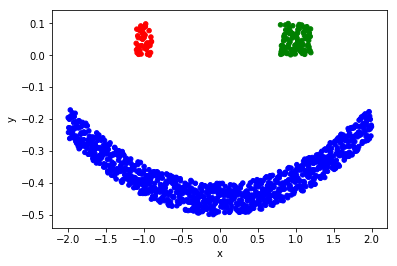

In [31]:
df_from_hdf.plot.scatter(x='x', y='y', c=c)
plt.savefig('NeuroSYS_DS_Assignment.png')

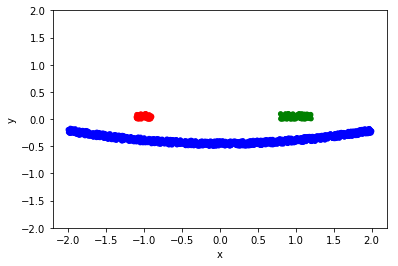

In [32]:
df_from_hdf.plot.scatter(x='x', y='y', c=c, ylim=[-2,2])